In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='akhtar786',
    database='ecommerce'
)
cur = db.cursor()

# ALL UNIQUE CITIES WHERE CUSTOMERS ARE LOCATED.


In [8]:
query="""select distinct customer_city from customers
"""
cur.execute(query)
unique_cities=cur.fetchall()
unique_cities

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the numbers of order placed in 2017

In [9]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017
"""
cur.execute(query)
Total_orders=cur.fetchall()
Total_orders[0][0]

135303

# Total sell per category

In [10]:
query="""select upper(products.product_category)as category,
round(sum(payments.payment_value),2) as sales
from products 
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""
cur.execute(query)
Total_sell_per_category=cur.fetchall()
Total_sell_per_category

[('PERFUMERY', 6080863.92),
 ('FURNITURE DECORATION', 17162116.7),
 ('TELEPHONY', 5842584.61),
 ('BED TABLE BATH', 20550644.05),
 ('AUTOMOTIVE', 10227531.97),
 ('COMPUTER ACCESSORIES', 19023965.36),
 ('HOUSEWARES', 13137097.56),
 ('BABIES', 6478147.92),
 ('TOYS', 7428452.27),
 ('FURNITURE OFFICE', 7761917.85),
 ('COOL STUFF', 9356376.0),
 ('HEALTH BEAUTY', 19888477.43),
 ('PET SHOP', 3735227.64),
 ('GENERAL INTEREST BOOKS', 776337.12),
 ('STATIONARY STORE', 3809280.84),
 ('WATCHES PRESENT', 17150600.14),
 ('PCS', 3349458.59),
 ('CLIMATIZATION', 1094047.91),
 ('CONSTRUCTION TOOLS CONSTRUCTION', 2897707.56),
 ('SPORT LEISURE', 16705530.71),
 ('BAGS ACCESSORIES', 2245815.48),
 ('ELECTRONICS', 3118285.2),
 ('CASA CONSTRUCAO', 1639743.48),
 ('GAMES CONSOLES', 2345764.55),
 ('FASHION BAGS AND ACCESSORIES', 2617899.36),
 ('HOME APPLIANCES', 1146387.24),
 ('GARDEN TOOLS', 10059369.01),
 ('AGRO INDUSTRIA E COMERCIO', 1424767.33),
 (None, 3033620.52),
 ('AUDIO', 723895.44),
 ('TECHNICAL BOOKS', 

Calculate the percentage of orders paid in installment

In [11]:
query="""select sum(case when payment_installments>=1 then 1 else 0 end)/count(*)*100 from payments
"""
cur.execute(query)
Percentage_of_installment=cur.fetchall()
Percentage_of_installment

[(Decimal('100.0000'),)]

# Total number of customers by each states

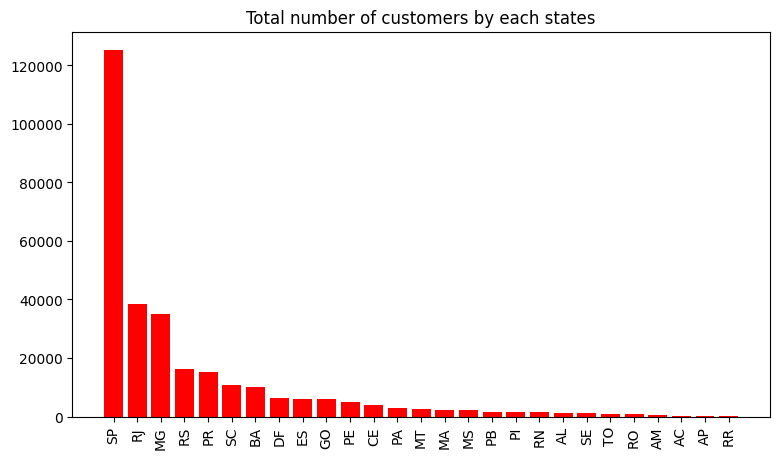

In [12]:
query="""select customer_state, count(customer_id) 
from customers
group by customer_state
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['States','Total_customers'])
df=df.sort_values(by = 'Total_customers' , ascending=False)
plt.figure(figsize=(9,5))
plt.bar(df['States'],df['Total_customers'],color='red')
plt.xticks(rotation=90)
plt.title('Total number of customers by each states')
plt.show()
                             

# Calculate the number of orders per months in 2018.

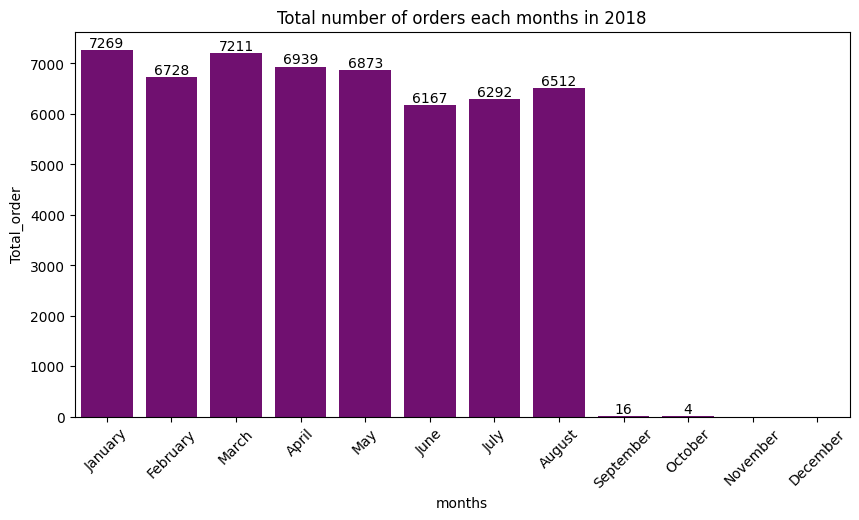

In [46]:
query="""select monthname(order_purchase_timestamp) as months, count(order_id)
from orders where year(order_purchase_timestamp) = 2018
group by months
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['months','Total_order'])
o=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.figure(figsize=(10,5))
ax=sns.barplot(x=df['months'], y=df['Total_order'], data=df, order=o, color='purple')
ax.bar_label(ax.containers[0])
plt.title('Total number of orders each months in 2018')
plt.xticks(rotation=45)
plt.show()

# Average number of products per order grouped by customer city.

In [56]:
query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id,
        orders.customer_id,
        COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items
        ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city,
    ROUND(AVG(count_per_order.oc),2) AS average_orders
FROM customers
JOIN count_per_order
    ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city order by average_orders desc
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['City','Average_order'])
df.head(10)

,City,Average_order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


# Percentage of total revenue contributed by each product category.

In [62]:
query="""select upper(products.product_category)as category,
round(sum(payments.payment_value)/(select sum(payment_value) from payments)*100,2)as sales_percentage
from products 
join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category 
order by sales_percentage desc 
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Category','Percentage'])
df.head(10)

,Category,Percentage
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
5,SPORT LEISURE,8.70
6,HOUSEWARES,6.84
7,AUTOMOTIVE,5.32
8,GARDEN TOOLS,5.24
9,COOL STUFF,4.87


# Co-relation between product price and number of times it has been purchased.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='akhtar786',
    database='ecommerce'
)
cur = db.cursor()
query="""SELECT 
    products.product_category,
    count(order_items.product_id),
    round(avg(order_items.price),2) AS total_sales
FROM products
JOIN order_items
    ON products.product_id = order_items.product_id
GROUP BY products.product_category;


"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Category','Order_count','Total_sale'])
arr1=df['Order_count']
arr2=df['Total_sale']
a=np.corrcoef([arr1,arr2])
print('The co-relation between them is',a[0][-1].round(2))

The co-relation between them is -0.11


# Total revenue generated by each seller and rank them.

In [84]:
query="""select * , dense_rank()over( order by revenue desc) as rn from
(select order_items.seller_id, round(sum(payments.payment_value),2) as revenue
from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Seller_id','Revenue','Rank'])
df.head()

,Seller_id,Revenue,Rank
0,7c67e1448b00f6e969d365cea6b010ab,507166.91,1
1,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2
2,4a3ca9315b744ce9f8e9374361493884,301245.27,3
3,1f50f920176fa81dab994f9023523100,290253.42,4
4,53243585a1d6dc2643021fd1853d8905,284903.08,5


# Moving average of order by each customer over the history.

In [17]:
query="""select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a

"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Customer_id','Purchase_timestamp','Average','Moving_average'])
df.head()

,Customer_id,Purchase_timestamp,Average,Moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


# Cumulative sales per months for each year.

In [19]:
query="""select years, months,payment, sum(payment)
over(order by years, months) as cumulative_sales from
(select year(orders.order_purchase_timestamp)as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months)as a
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Years','Months','',''])
df.head()

,Years,Months,,
0,2016,9,1513.44,1513.44
1,2016,10,354542.88,356056.32
2,2016,12,117.72,356174.04
3,2017,1,830928.24,1187102.28
4,2017,2,1751448.06,2938550.34


# Year over year growth rate of total sale.

In [30]:
query="""with a as(select year(orders.order_purchase_timestamp)as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years,payment,round(((payment-lag(payment,1)over(order by years))/lag(payment,1)over(order by years))*100,2) from a
"""

cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data, columns=['Years','Total_sale_each_year','YOY % growth'])
df.head()

,Years,Total_sale_each_year,YOY % growth
0,2016,356174.04,NaN
1,2017,43498480.37,12112.7
2,2018,52198578.31,20.0


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [31]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data #Since there is no repeated customers within 6 months the value is null.

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

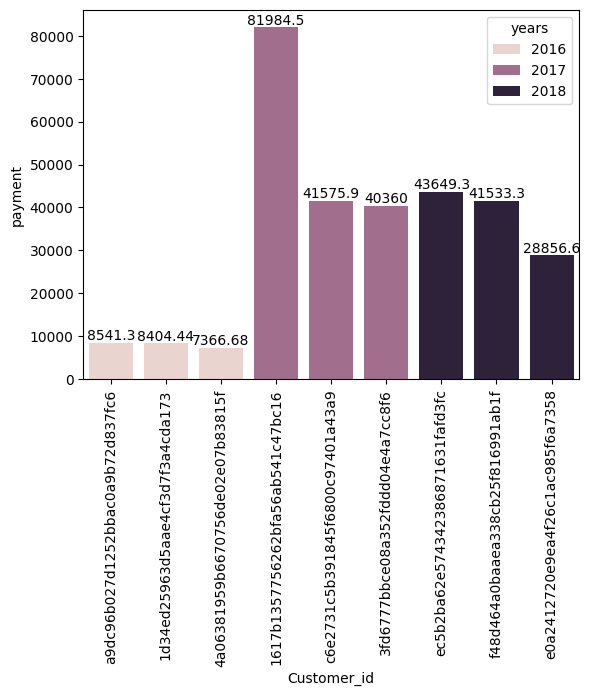

In [40]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","Customer_id","payment","rank"])
ax=sns.barplot(x = "Customer_id", y = "payment", data = df, hue = "years")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation = 90)
plt.show()